<a href="https://colab.research.google.com/github/Jeru-John/ML-case-studies/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Preprocessing:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/IMDB Dataset.csv', header=None, delimiter="\t", error_bad_lines=False, quoting=csv.QUOTE_NONE, encoding='utf-8')
data.head()

Skipping line 312: expected 1 fields, saw 7
Skipping line 1860: expected 1 fields, saw 5
Skipping line 4570: expected 1 fields, saw 5
Skipping line 5060: expected 1 fields, saw 5
Skipping line 6605: expected 1 fields, saw 6
Skipping line 7416: expected 1 fields, saw 8
Skipping line 9376: expected 1 fields, saw 2
Skipping line 9583: expected 1 fields, saw 7
Skipping line 10024: expected 1 fields, saw 2
Skipping line 11238: expected 1 fields, saw 6
Skipping line 12867: expected 1 fields, saw 2
Skipping line 14109: expected 1 fields, saw 9
Skipping line 17215: expected 1 fields, saw 5
Skipping line 19609: expected 1 fields, saw 2
Skipping line 22711: expected 1 fields, saw 7
Skipping line 26031: expected 1 fields, saw 4
Skipping line 26189: expected 1 fields, saw 5
Skipping line 26604: expected 1 fields, saw 4
Skipping line 27793: expected 1 fields, saw 6
Skipping line 31616: expected 1 fields, saw 4
Skipping line 34225: expected 1 fields, saw 2
Skipping line 36341: expected 1 fields, saw

,0
0,"review,sentiment"
1,"""One of the other reviewers has mentioned that..."
2,"""A wonderful little production. <br /><br />Th..."
3,"""I thought this was a wonderful way to spend t..."
4,"""Basically there's a family where a little boy..."


In [4]:
# Split the values in the first column into two columns
data[['review', 'sentiment']] = data[0].str.rsplit(',', 1, expand=True)
# Drop the original column
data.drop(0, axis=1, inplace=True)
data.head()

,review,sentiment
0,review,sentiment
1,"""One of the other reviewers has mentioned that...",positive
2,"""A wonderful little production. <br /><br />Th...",positive
3,"""I thought this was a wonderful way to spend t...",positive
4,"""Basically there's a family where a little boy...",negative


In [5]:
# Explore final shape and size.
row, column = data.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 49974 rows and 2 columns


# **EDA:**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49974 entries, 0 to 49973
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49974 non-null  object
 1   sentiment  49974 non-null  object
dtypes: object(2)
memory usage: 781.0+ KB


In [7]:
data['sentiment'].value_counts()

negative     24988
positive     24985
sentiment        1
Name: sentiment, dtype: int64

Inference: it seems like there is 2 more values in sentiment column which is neither positive nor negative. Hence droping that.

In [8]:
filtered_data = data[data['sentiment'].isin(['positive', 'negative'])]

print(filtered_data)

                                                  review sentiment
1      "One of the other reviewers has mentioned that...  positive
2      "A wonderful little production. <br /><br />Th...  positive
3      "I thought this was a wonderful way to spend t...  positive
4      "Basically there's a family where a little boy...  negative
5      "Petter Mattei's ""Love in the Time of Money""...  positive
...                                                  ...       ...
49969  "I thought this movie did a down right good jo...  positive
49970  "Bad plot, bad dialogue, bad acting, idiotic d...  negative
49971  "I am a Catholic taught in parochial elementar...  negative
49972  "I'm going to have to disagree with the previo...  negative
49973  "No one expects the Star Trek movies to be hig...  negative

[49973 rows x 2 columns]


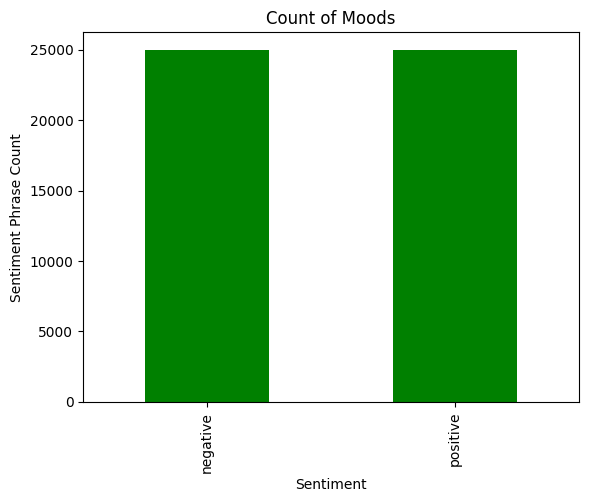

In [9]:
filtered_data['sentiment'].value_counts().sort_index().plot(kind='bar', color= 'green')
plt.ylabel('Sentiment Phrase Count')
plt.xlabel('Sentiment')
plt.title('Count of Moods');

Inference: It is clear that both negative and positive has equal weight which will be useful for us.

# **Tokenizing Words:**

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [11]:
stemmer  = SnowballStemmer(language='english') #setup for english language
stop_words = stopwords.words('english') # defining stop_words for english language
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies reviews
lemmatizer = WordNetLemmatizer()

In [12]:
# Download nltk resources (only needed once)
nltk.download('punkt')
nltk.download('wordnet')

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to create tokenizer using lemmatization
def tokenize(text):
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

# Test the tokenize function
tokens = tokenize("This is my test project")
print(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['This', 'is', 'my', 'test', 'project']


In [13]:
# Let's create a function to clean the Phrase column

def data_preprocess(Phrase):
    Phrase = re.sub(re.compile('<.*?>'), '', Phrase) #removing html tags if any
    Phrase =  re.sub('[^A-Za-z0-9]+', ' ', Phrase) #taking only words
    Phrase = Phrase.lower()   # making all phrases lower case
    tokens = nltk.word_tokenize(Phrase) # converts Phrases to tokens
    Phrase = [word for word in tokens if word not in stop_words] #removing stop words
    Phrase = [lemmatizer.lemmatize(word) for word in Phrase]   # lemmatization
    Phrase = ' '.join(Phrase)  # join words in preprocessed Phrase

    return Phrase

In [14]:
filtered_data['tokenized_review'] = filtered_data['review'].apply(lambda Phrase: data_preprocess(Phrase))
filtered_data.head()

,review,sentiment,tokenized_review
1,"""One of the other reviewers has mentioned that...",positive,one reviewer mentioned watching 1 oz episode h...
2,"""A wonderful little production. <br /><br />Th...",positive,wonderful little production filming technique ...
3,"""I thought this was a wonderful way to spend t...",positive,thought wonderful way spend time hot summer we...
4,"""Basically there's a family where a little boy...",negative,basically family little boy jake think zombie ...
5,"""Petter Mattei's """"Love in the Time of Money""""...",positive,petter mattei love time money visually stunnin...


**Visualising the positive reviews in word cloud:**

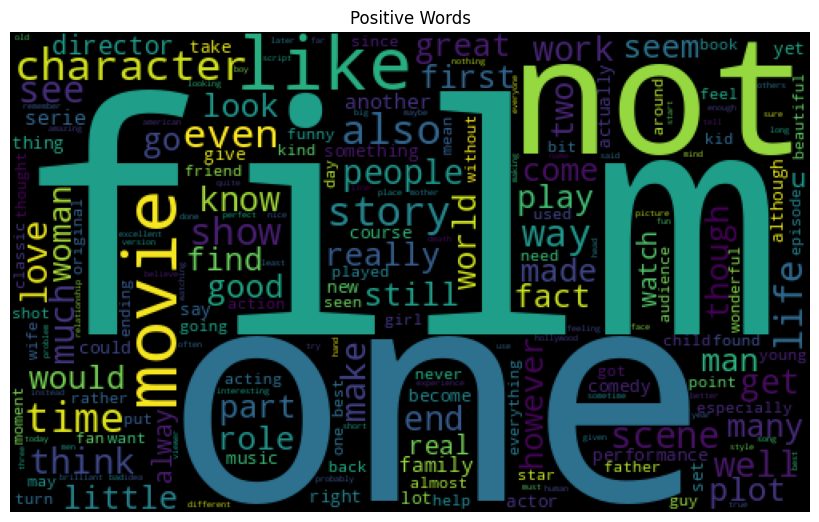

In [15]:
from wordcloud import WordCloud

words_list = filtered_data[filtered_data['sentiment']=='positive']['tokenized_review'].unique().tolist()
positive_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words')
plt.show()

**Visualising the Negative reviews in word cloud:**

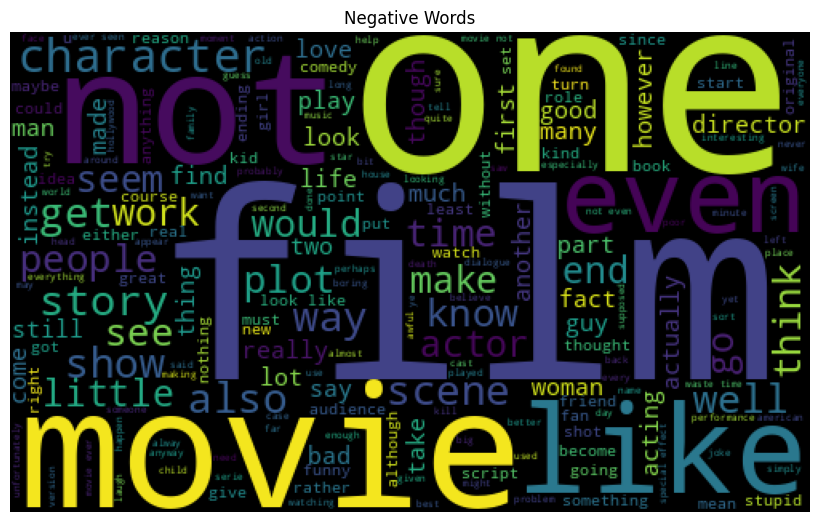

In [16]:
words_list = filtered_data[filtered_data['sentiment']=='negative']['tokenized_review'].unique().tolist()
positive_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300,
                  stopwords=stop_words).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words')
plt.show()

# **Data Cleaning:**

In [17]:
filtered_data.isnull().sum()

review              0
sentiment           0
tokenized_review    0
dtype: int64

In [18]:
filtered_data.duplicated().sum()

418

In [19]:
filtered_data.drop_duplicates(inplace=True)

In [20]:
filtered_data.duplicated().sum()

0

**Lower Casing the reviews:**

In [21]:
filtered_data['review'] = filtered_data['review'].str.lower()

**Removing HTML tags:**

In [22]:
import re
def tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [23]:
filtered_data['review'] = filtered_data['review'].apply(tags)

In [24]:
filtered_data['review'][1]

'"one of the other reviewers has mentioned that after watching just 1 oz episode you\'ll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows 

**Removing Punctuations:**

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
exclude = string.punctuation

In [27]:
def punct(text):
    return text.translate(str.maketrans('','',exclude))

In [28]:
filtered_data['review'] = filtered_data['review'].apply(punct)

In [29]:
filtered_data['review'][1]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

**Removing StopWords:**

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
filtered_data['review'] = filtered_data['review'].apply(lambda x:[word for word in x.split() if word not in sw]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
filtered_data['review'][1]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

**Handeling Emojis:**

In [32]:
!pip install emoji
import emoji

In [33]:
def demoji(text):
    review = emoji.demojize(text)
    return review

In [34]:
# filtered_data['review'] = filtered_data['review'].apply(demoji)

In [35]:
filtered_data

,review,sentiment,tokenized_review
1,one reviewers mentioned watching 1 oz episode ...,positive,one reviewer mentioned watching 1 oz episode h...
2,wonderful little production filming technique ...,positive,wonderful little production filming technique ...
3,thought wonderful way spend time hot summer we...,positive,thought wonderful way spend time hot summer we...
4,basically theres family little boy jake thinks...,negative,basically family little boy jake think zombie ...
5,petter matteis love time money visually stunni...,positive,petter mattei love time money visually stunnin...
...,...,...,...
49969,thought movie right good job wasnt creative or...,positive,thought movie right good job creative original...
49970,bad plot bad dialogue bad acting idiotic direc...,negative,bad plot bad dialogue bad acting idiotic direc...
49971,catholic taught parochial elementary schools n...,negative,catholic taught parochial elementary school nu...
49972,im going disagree previous comment side maltin...,negative,going disagree previous comment side maltin on...


# **Splitting data into Training and Testing**

In [47]:
from sklearn.model_selection import train_test_split

train_df = filtered_data.copy()
y = train_df['sentiment'].values
train_df.drop(['sentiment'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (39644, 2) (39644,)
Test data: (9911, 2) (9911,)


# **BOW: Bag Of Words**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_phrase_bow = vectorizer.fit_transform(X_train['tokenized_review'])
X_test_phrase_bow = vectorizer.transform(X_test['tokenized_review'])

print('X_train_phrase_bow shape: ', X_train_phrase_bow.shape)
print('X_test_phrase_bow shape: ', X_test_phrase_bow.shape)

X_train_phrase_bow shape:  (39644, 85052)
X_test_phrase_bow shape:  (9911, 85052)


# **Model Building:**

**Naive Bayes: BOW**

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_phrase_bow, y_train)

y_pred = clf.predict(X_test_phrase_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8584401170416709


Let's plot a confusion matrix of this classifier to help understand how well our model performs and also to find out if there is a pattern in the classification errors.

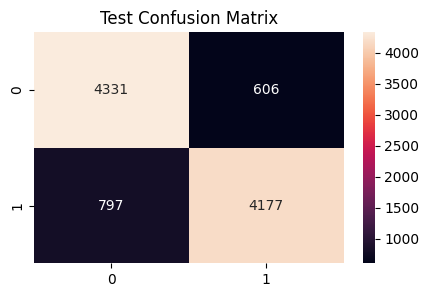

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

Building a model with Naive Bayes' Term Frequency-Inverse Document Frequency (TFIDF)
We will use this classifier to convert text data into TF-IDF vectors. This classifier will learn the relationship between TF-IDF vectors and their corresponding class labels.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_phrase_tfidf = vectorizer.fit_transform(X_train['tokenized_review'])
X_test_phrase_tfidf = vectorizer.transform(X_test['tokenized_review'])

print('X_train_phrase_tfidf shape: ', X_train_phrase_tfidf.shape)
print('X_test_phrase_tfidf shape: ', X_test_phrase_tfidf.shape)

X_train_phrase_tfidf shape:  (39644, 85052)
X_test_phrase_tfidf shape:  (9911, 85052)


In [53]:
lf = MultinomialNB(alpha=1)
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8646957925537282


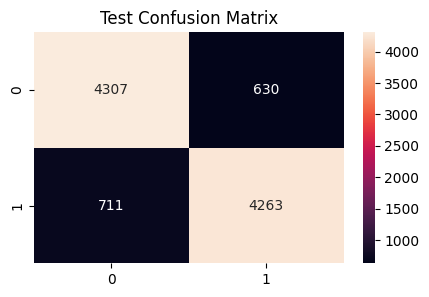

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

**Using Logistic Regression TFIDF Model:**

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_phrase_tfidf, y_train)

y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8954696801533649


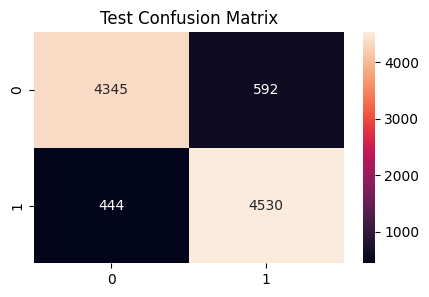

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

**Visualizing the three models on a Table:**

In [58]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '86%'])
x.add_row(['TFIDF', 'Naive Bayes', '86%'])
x.add_row(['TFIDF', 'Logistic Regression', '90%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |   86%    |
|   TFIDF    |     Naive Bayes     |   86%    |
|   TFIDF    | Logistic Regression |   90%    |
+------------+---------------------+----------+


**Conclusion:**
The Logistic Regression(TFIDF) model performed better than the Naive Bayes(BOW) and the Naive Bayes(TFIDF) with accuracy of 90%. This could be due to the characteristics of the dataset, including the distribution of classes and the balance between classes. Furthermore, The results could also be influenced by the data split used for training and testing which can provide a more robust estimate of model performance.

# **Test Run:**

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to create tokenizer using lemmatization
def tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

# Assuming you have your vectorized training data (X_train_phrase_tfidf)
# Train your model
clf = LogisticRegression(penalty='l2')
clf.fit(X_train_phrase_tfidf, y_train)

# Function to classify user input
def classify_input():
    user_input = input("Enter a review: ")
    # Assuming 'vectorizer' is your TfidfVectorizer used on the training data
    user_input_vectorized = vectorizer.transform([user_input])
    prediction = clf.predict(user_input_vectorized)
    return prediction[0]

# Test the model on the test data
y_pred = clf.predict(X_test_phrase_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

# Classify user input
user_prediction = classify_input()
print(f'Predicted sentiment: {user_prediction}')

Test Accuracy:  0.8954696801533649
Enter a review: This is very bad
Predicted sentiment: negative
